In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0,0.5,'Magnitud')

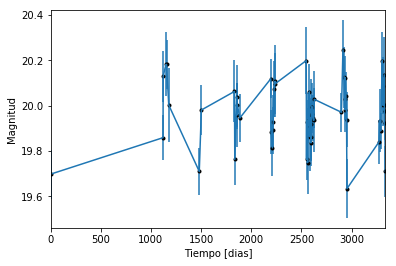

In [2]:
data = np.genfromtxt('LC_20907_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

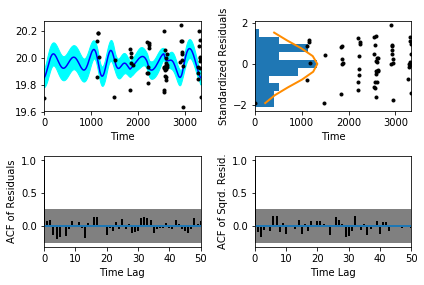

In [5]:
sample.assess_fit()

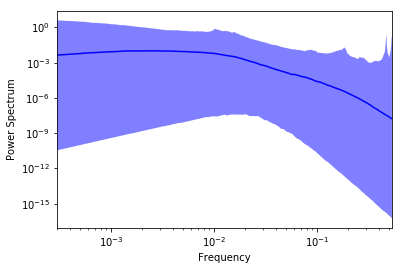

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)


In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.000374595,1.03876,'Medida del nivel de ruido')

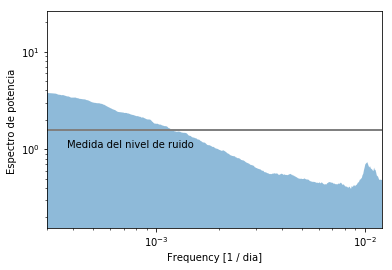

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))

Text(0.5,1,'Prediccion , valor esperado ')

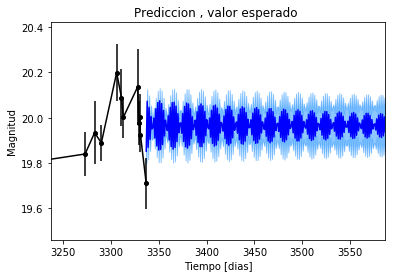

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado ')

Text(0.5,1,'Prediccion, Caminos simulados')

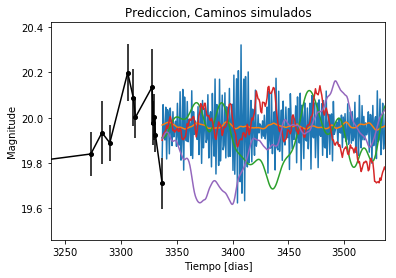

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


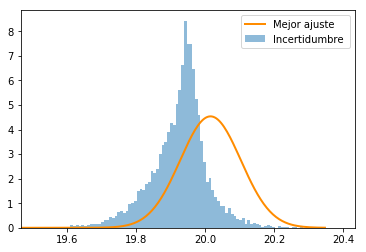

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')

Text(0.5,1,'Interpolacion, camino simulado')

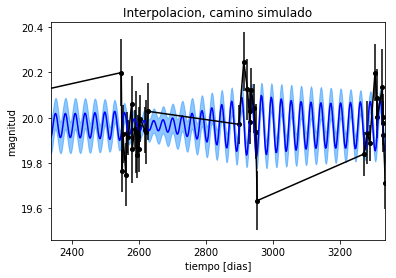

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

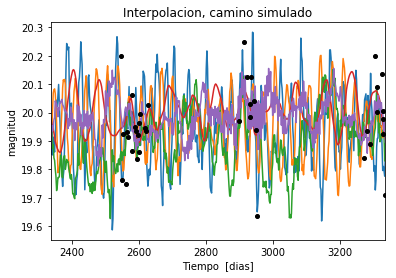

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 1185.13525631
Median: 0.00533773764128
Standard deviation: 0.170322616088
68% credibility interval: [ 0.00073513  0.11125679]
95% credibility interval: [  3.59057125e-04   6.81773327e-01]
99% credibility interval: [  3.13847483e-04   9.77989563e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 378.268034794
Median: 0.00333875895094
Standard deviation: 0.105624711314
68% credibility interval: [ 0.0006489   0.04511398]
95% credibility interval: [ 0.00034229  0.34151491]
99% credibility interval: [  3.11076171e-04   6.97828650e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 554.052389835
Median: 0.0183866364531
Standard 

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 296.348322629
Median: 66.3406040386
Standard deviation: 1.85214749138
68% credibility interval: [ 64.73881369  67.58462679]
95% credibility interval: [ 62.34844323  70.76184785]
99% credibility interval: [ 60.34882064  71.78177364]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 11755.3738914
Median: 0.706622981168
Standard deviation: 2.31439676919
68% credibility interval: [ 0.06407717  4.07354602]
95% credibility interval: [ 0.01404045  7.60200616]
99% credibility interval: [  1.01448424e-02   1.18669317e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 556.017879768
Median: 2.27163409665
Standard deviation: 12.4020568472
68% credibility interval: [  0.08049379  16.83216089]
95% credibility interval: [  8.

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 12890.9384951
Median: 0.0234077468665
Standard deviation: 1.94264756413e+76
68% credibility interval: [  5.68420543e-44   3.15901150e+36]
95% credibility interval: [  3.65921484e-115   1.64515250e+051]
99% credibility interval: [  3.02456263e-176   1.16568961e+075]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2324.99591448
Median: 19.9542691252
Standard deviation: 0.0242314102328
68% credibility interval: [ 19.93492646  19.97334644]
95% credibility interval: [ 19.90287787  19.99319379]
99% credibility interval: [ 19.85516328  20.01367871]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 1794.58451937
Median: 0.154296068047
Standard deviation: 0.292486240073
68% credibility interval: [ 0.00544152  0.58206142]
95% credibility interval: [ 0.          0.97814457]
99% credibility interval: [ 0.         1.0387833]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 1794.58451937
Median: 0.154296068047
Standard deviation: 0.292486240073
68% credibility interval: [ 0.00544152  0.58206142]
95% credibility interval: [ 0.          0.97814457]
99% credibility interval: [ 0.         1.0387833]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 251.988159014
Median: 0.0
Standard deviation: 0.107657329852
68% credibility

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 296.348322629
Median: 66.3406040386
Standard deviation: 1.85214749138
68% credibility interval: [ 64.73881369  67.58462679]
95% credibility interval: [ 62.34844323  70.76184785]
99% credibility interval: [ 60.34882064  71.78177364]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1372.24315334
Median: 0.003732379821
Standard deviation: 0.00657506033617
68% credibility interval: [ 0.00058538  0.00999203]
95% credibility interval: [  1.44171931e-05   2.00361139e-02]
99% credibility interval: [  5.33919158e-07   3.44559328e-02]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 511.435822291
Median: 1.07331621649
Standard deviation: 0.181716962568
68% credibility interval: [ 0.90033241  1.26298618]
95% credibility interval: [ 0.76600209  1.46444156]
99% credibility interval: [ 0.69557213  1.61188908]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 874.214694155
Median: 4.61599083975e-06
Standard deviation: 1.12530970345
68% credibility interval: [  3.35961656e-39   1.93882613e-02]
95% credibility interval: [  7.65430329e-54   8.56466959e-01]
99% credibility interval: [  4.23055562e-79   3.83850230e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 1185.13525631
Median: (-0.0335379947213-1.13674895807j)
Standard deviation: 2.12663309818
68% credibility interval: [-0.69904706-0.64364208j -0.00461898-3.3641222j ]
95% credibility interval: [ -4.28370815e+00+0.j          -2.25602245e-03-2.96335722j]
99% credibility interval: [ -6.14488966e+00+0.j          -1.97196190e-03-0.10374677j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 378.268034794
Median: (-0.0209780411848+1.22187414318j)
Standard deviation: 1.95390677872
68% credibility interval: [-0.28345947+4.4743636j  -0.00407717+1.75498104j]
95% credibility interval: [-2.14580148+6.4737247j  -0.00215068+0.01266743j]
99% credibility interval: [ -4.38458672e+00 +4.64597151e+00j  -1.95454923e-03 +2.29824989e-03j]
Post